# The Bisection Method (二分法)

对于区间 $[a，b]$ 上**连续不断**且 $f(a) \cdot f(b)<0$ 的函数 $y=f(x)$，通过不断地把函数$f(x)$ 的零点所在的区间一分为二，使区间的两个端点逐步逼近零点，进而得到零点近似值的方法叫二分法。

## 算法

在区间 $\left[a, b\right]$ 给定一个连续函数 $f$，求解 $f(x)=0$，其中 $f\left(a\right)$ 和 $f\left(b\right)$ 符号相反。

- **INPUT** endpoints $a, b$; tolerance $T O L$; maximum number of iterations $N_{0}$

- **OUTPUT** approximate solution $p$ or message of failure. 

- **Step 1** $\quad$ Set $i=1$   
    $F A=f(a)$

- **Step 2** $\quad$ While $i \leq N_{0}$ do **Steps 3-6**

    - **Step 3** $\quad$ Set $p=a+(b-a) / 2 ; \quad$ (Compute $p_{i}$.)    
        $F P=f(p)$

    - **Step 4** $\quad$ If $FP=0$ or $(b-a)/2 < TOL$ then 
        **OUTPUT**$(p) ; \quad$ (Procedure completed successfully.) 
        **STOP**.

    - **Step 5** $\quad$ Set $i=i+1$

    - **Step 6** $\quad$ If $FA \cdot FP > 0$ then   
        set $a=p$; (Compute $a_{i}, b_{i}$.)    
        $FA=FP$   
        else   
        set $b=p$. (FA is unchanged.)

- **Step 7** $\quad$ **OUTPUT** ('Method failed after $N_{0}$ iterations, $N_{0}=', N_{0}$ );    
    (The procedure was unsuccessful.)    
    **STOP**.

## 示例：Python 二分法求一元方程

二分法求 $x^{3}-2 x-5=0$ 在 $[2，3]$ 之间的根

In [1]:
def SqrtBisection(equation, a, b, N, tol=1e-4):
    """Finding the Roots of a Univariate Equation by The Bisection Method 
    
    Args:
        equation: the equation that need to find the root
        a: endpoints a
        b: endpoints b 
        N: maximum number of iterations
        tol: tolerance
        
    Returns:
        i: iterations i
        res: approximate solution p
    
    """
    i = 1
    xp = {}
    FA = equation(a)
    while i <= N:   
        p = a + (b-a)/2
        FP = equation(p)
        if FP==0 or (b-a)/2 < tol:
            xp[i] = p
            return p, xp
        xp[i] = p
        i += 1
        if FA*FP > 0:
            a = p
        else:
            b = p
    return p, xp

In [2]:
# 定义方程
def fx(x):
    f= pow(x,3) - 2*x - 5
    return f

In [3]:
re, xp = SqrtBisection(fx, 2, 3, 100)
print(re)

for key in xp:
    err_re = 0 if key == 1 else abs(xp[key]-xp[key-1])/abs(min(xp[key], xp[key-1]))
    print('Iterations %d, pn = %0.9f, f(pn) = %0.9f, Err_Re = %0.9f ' % (key, xp[key], fx(xp[key]), err_re))

2.09454345703125
Iterations 1, pn = 2.500000000, f(pn) = 5.625000000, Err_Re = 0.000000000 
Iterations 2, pn = 2.250000000, f(pn) = 1.890625000, Err_Re = 0.111111111 
Iterations 3, pn = 2.125000000, f(pn) = 0.345703125, Err_Re = 0.058823529 
Iterations 4, pn = 2.062500000, f(pn) = -0.351318359, Err_Re = 0.030303030 
Iterations 5, pn = 2.093750000, f(pn) = -0.008941650, Err_Re = 0.015151515 
Iterations 6, pn = 2.109375000, f(pn) = 0.166835785, Err_Re = 0.007462687 
Iterations 7, pn = 2.101562500, f(pn) = 0.078562260, Err_Re = 0.003717472 
Iterations 8, pn = 2.097656250, f(pn) = 0.034714282, Err_Re = 0.001862197 
Iterations 9, pn = 2.095703125, f(pn) = 0.012862332, Err_Re = 0.000931966 
Iterations 10, pn = 2.094726562, f(pn) = 0.001954348, Err_Re = 0.000466200 
Iterations 11, pn = 2.094238281, f(pn) = -0.003495149, Err_Re = 0.000233155 
Iterations 12, pn = 2.094482422, f(pn) = -0.000770775, Err_Re = 0.000116577 
Iterations 13, pn = 2.094604492, f(pn) = 0.000591693, Err_Re = 0.000058282 


### 验证

In [4]:
fre = fx(re)
print(fre)

-8.956467604548379e-05


Text(0.5, 1.0, 'Bisection Method')

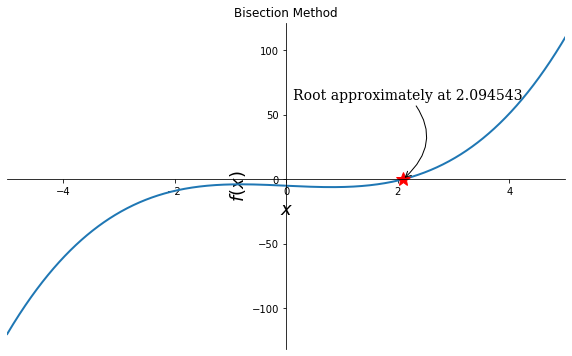

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-5, 5, 1000)
y = fx(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, linewidth=2)
#截取x的某一部分
plt.xlim((-5,5))

ax = plt.gca() # 获取当前轴
# 去掉轴上边和右边
ax.spines['right'].set_color('None')
ax.spines['top'].set_color('None')
# 移动下边和左边
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

# 把 root 画出来
ax.plot(re, fx(re), 'r*', markersize=14)
# root 点做一个注释
ax.annotate("Root approximately at %f" % re,
    fontsize=14, family="serif",
    xy=(re, fre), xycoords='data',
    xytext=(-110, 80), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)
ax.set_title("Bisection Method")